###America Market Sample Superstore From 2015 - 2018
----- 
Sales Performance By Region And Month Report_JIALIU

Step

1 Load Data

2 Exploratory Analysis Data

3 Feature Engineering
* Check the missing value and fill the null value
* Drop data 
* Clean and Split the data

4 Modeling Portion
* Linear Regression
* KNN_Regression
* Random Forest
* XGBoost


**Import Libraries and Load Dataset**

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df=pd.read_csv('../content/drive/My Drive/AmericaMarketSampleSuperstoreFrom2015To2018/SampleSuperstore.csv', encoding='Latin-1')

**Exploratory Analysis Data**

---

In [4]:
#Dataset Preview
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,11/8/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2017-152156,11/8/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2017-138688,6/12/17,6/16/17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2016-108966,10/11/16,10/18/16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2016-108966,10/11/16,10/18/16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [5]:
# Show descriptive statistics of training set
df.describe()

,PostalCode,Sales,Quantity,Discount,Profit
count,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55245.233297,229.858001,3.789574,0.156203,28.656896
std,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Review all column idex
df.columns.values

array(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode',
       'CustomerID', 'CustomerName', 'Segment', 'Country', 'City',
       'State', 'PostalCode', 'Region', 'ProductID', 'Category',
       'SubCategory', 'ProductName', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

In [7]:
#Number of rows and columns 
print(df.shape)

(10800, 21)


In [8]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         10800 non-null  object 
 1   OrderID       10800 non-null  object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9983 non-null   float64
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  SubCategory   9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-nul

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f7afaef28>,
      dtype=object)

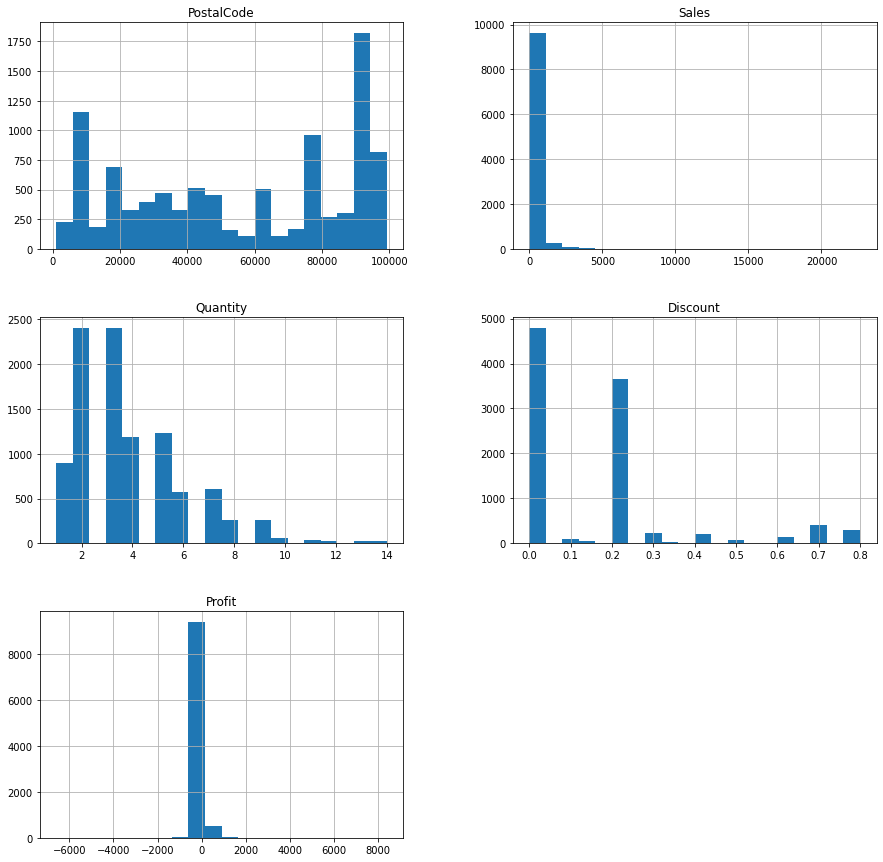

In [9]:
# Visualization for data statistic distribution
# We will find out which feature we can use 
df.hist(figsize = (15,15),bins=20)

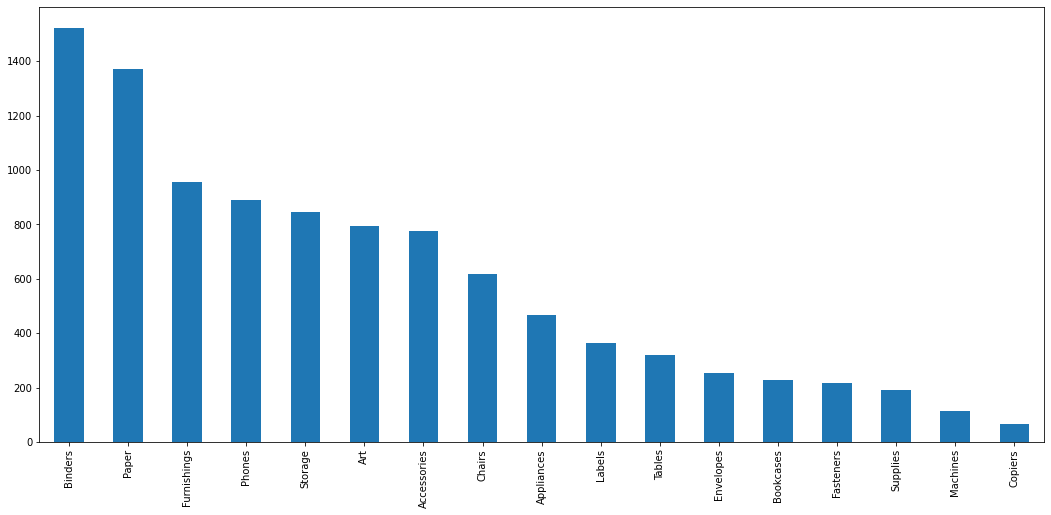

In [10]:
df.SubCategory.value_counts().plot(kind='bar',figsize=(18,8))

In [11]:
# state wise profit distribution
state_sales = df.groupby('State').sum()['Sales']
state_sales

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

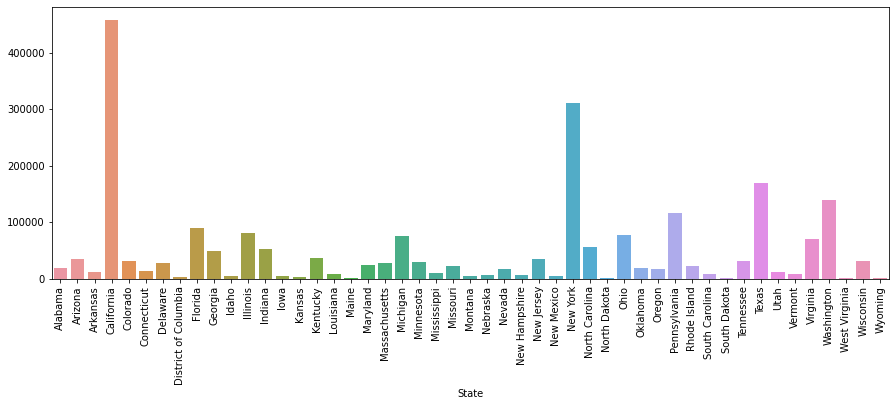

In [12]:
#performance 
plt.figure(figsize=(15,5))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.xticks(rotation=90)

plt.show()

In [13]:
# state wise profit distribution
state_profit = df.groupby('State').sum()['Profit']
state_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

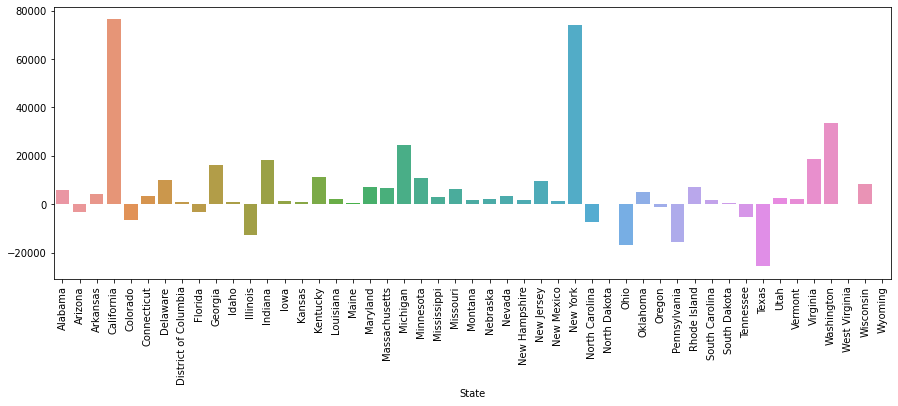

In [14]:
#Profit chart
plt.figure(figsize=(15,5))
sns.barplot(x=state_profit.index, y=state_profit.values)
plt.xticks(rotation=90)

plt.show()

##Feature Engineering

---
Clean up the data and delete the unuseful data

Actions For Featutres 
* RowID           :Delete
* OrderID         :Delete
* OrderDate       :Time Series 
* ShipDate        :Time Series 
* ShipMode        :Time Series  
* CustomerID      :Delete
* CustomerName    :Delete
* Segment         :Consumer/Corporate 
* Country         :Delete
* City            
* State           
* PostalCode      
* Region          : South / West/ North/ East/ Center
* ProductID       :SKU_Nmuber
* Category        
* SubCategory     
* ProductName     :Delet
* Sales            
* Quantity        
* Discount        
* Profit          


In [15]:
# Review all column index
df.columns.values

array(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode',
       'CustomerID', 'CustomerName', 'Segment', 'Country', 'City',
       'State', 'PostalCode', 'Region', 'ProductID', 'Category',
       'SubCategory', 'ProductName', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

Missing Value

---

In [16]:
#Check Null Data 
df.isnull().sum()

RowID             0
OrderID           0
OrderDate       806
ShipDate        806
ShipMode        806
CustomerID      806
CustomerName    806
Segment         806
Country         806
City            806
State           806
PostalCode      817
Region          806
ProductID       806
Category        806
SubCategory     806
ProductName     806
Sales           806
Quantity        806
Discount        806
Profit          806
dtype: int64

In [17]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

OrderDate: 0.0746% missing values
ShipDate: 0.0746% missing values
ShipMode: 0.0746% missing values
CustomerID: 0.0746% missing values
CustomerName: 0.0746% missing values
Segment: 0.0746% missing values
Country: 0.0746% missing values
City: 0.0746% missing values
State: 0.0746% missing values
PostalCode: 0.0756% missing values
Region: 0.0746% missing values
ProductID: 0.0746% missing values
Category: 0.0746% missing values
SubCategory: 0.0746% missing values
ProductName: 0.0746% missing values
Sales: 0.0746% missing values
Quantity: 0.0746% missing values
Discount: 0.0746% missing values
Profit: 0.0746% missing values


In [18]:
df.fillna(df.mean(), inplace=True)

In [19]:
#We can see all the floate64 dtype already fill in 
df.isnull().sum()

RowID             0
OrderID           0
OrderDate       806
ShipDate        806
ShipMode        806
CustomerID      806
CustomerName    806
Segment         806
Country         806
City            806
State           806
PostalCode        0
Region          806
ProductID       806
Category        806
SubCategory     806
ProductName     806
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [20]:
data = df.copy()

# **Drop Data**

**RowID**

---


"RowId " is not helpful of model training. Drop this attribute.


In [21]:
data = data.drop("RowID", axis = 1)
data.shape

(10800, 20)

**ShipMode**

---


"ShipMode" is not helpful of model training. Drop this attribute.


In [22]:
data = data.drop("ShipMode", axis = 1)
data.shape

(10800, 19)

**CustomerID**

---


"CustomerID" is not helpful of model training. Drop this attribute.


In [23]:
data = data.drop("CustomerID", axis = 1)
data.shape

(10800, 18)

**CustomerName**

---


"CustomerName" is not helpful of model training. Drop this attribute.


In [24]:
data = data.drop("CustomerName", axis = 1)
data.shape

(10800, 17)

**Country**

---


"Country" is not helpful of model training. Drop this attribute.


In [25]:
data = data.drop("Country", axis = 1)
data.shape

(10800, 16)

**City**

---


"City" is not helpful of model training. Drop this attribute.


In [26]:
data = data.drop("City", axis = 1)
data.shape

(10800, 15)

**State**

---


"State" is not helpful of model training. Drop this attribute.

In [27]:
data = data.drop("State", axis = 1)
data.shape

(10800, 14)

**Category**

---


"Category" is not helpful of model training. Drop this attribute.

In [28]:
data = data.drop("Category", axis = 1)
data.shape

(10800, 13)

**SubCategory**

---


"Category" is not helpful of model training. Drop this attribute.

In [29]:
data = data.drop("SubCategory", axis = 1)
data.shape

(10800, 12)

**ProductName**

---


"ProductName" is not helpful of model training. Drop this attribute.

In [30]:
data = data.drop("ProductName", axis = 1)
data.shape

(10800, 11)

**Segment**

---


"Segment" will show us our customer come from Consumer and Corporate 

In [31]:
data.Segment.describe()

count         9994
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


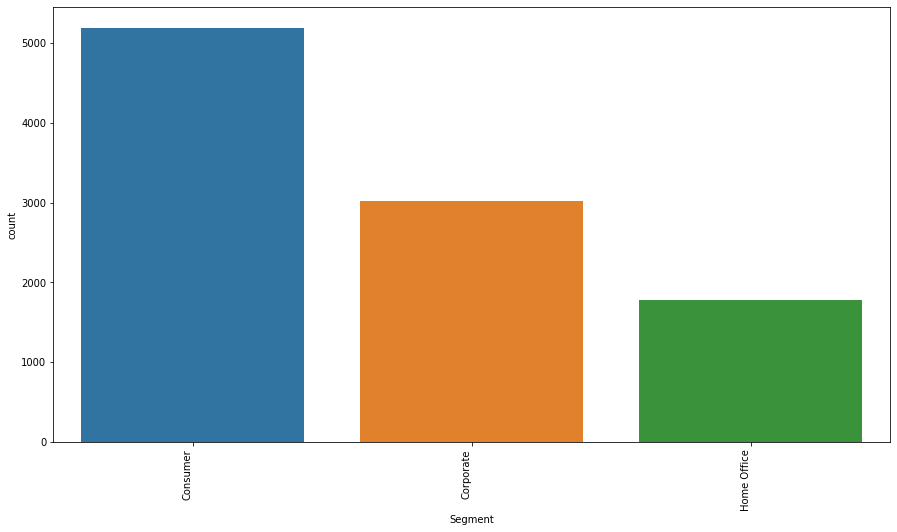

In [32]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data.Segment)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

**Region**

---


"Region" will show us our whitch city has best profite 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


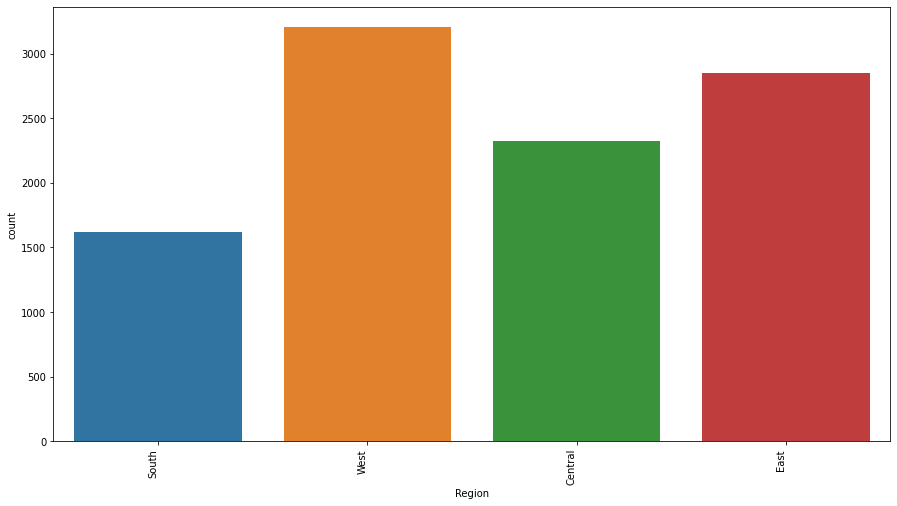

In [33]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data.Region )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

**Category**

---


"Category" will show us our whitch city has best profite 

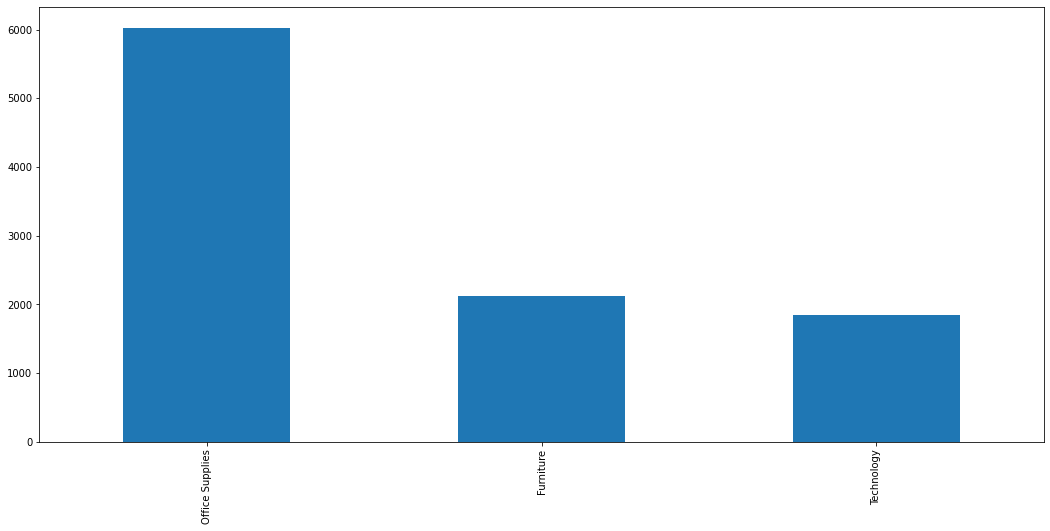

In [34]:
df.Category.value_counts().plot(kind='bar',figsize=(18,8))

**Price**

---


"Price" need carefully about outliers and null value 

In [35]:
data.Sales.describe()

count    10800.000000
mean       229.858001
std        599.535697
min          0.444000
25%         18.900000
50%         65.955000
75%        229.858001
max      22638.480000
Name: Sales, dtype: float64

In [36]:
data.Sales.isnull().sum()


0

In [37]:
data.shape

(10800, 11)

**Discount**

---


"Discount" need carefully about outliers that means discount over 50% off, we don't have profit in this item, so we need to know which orderId.

In [38]:
data.Discount.describe()

count    10800.000000
mean         0.156203
std          0.198598
min          0.000000
25%          0.000000
50%          0.156203
75%          0.200000
max          0.800000
Name: Discount, dtype: float64

In [39]:
# Discount higher than 0.5
temp = data[data.Discount > 0.5]
cnt = temp.shape[0]
temp1 = data.loc[data['Discount'] >0.5]
print("Discount higher than 0.5: ", cnt)
print (temp1)

Discount higher than 0.5:  856
             OrderID OrderDate  ShipDate  ... Quantity  Discount    Profit
14    US-2016-118983  11/22/16  11/26/16  ...      5.0       0.8 -123.8580
15    US-2016-118983  11/22/16  11/26/16  ...      3.0       0.8   -3.8160
28    US-2016-150630   9/17/16   9/21/16  ...      2.0       0.7   -7.0532
32    US-2016-150630   9/17/16   9/21/16  ...      6.0       0.7   -5.7150
36    CA-2017-117590   12/8/17  12/10/17  ...      5.0       0.6 -147.9630
...              ...       ...       ...  ...      ...       ...       ...
9870  CA-2015-114195   11/1/15   11/3/15  ...      3.0       0.7  -17.9424
9877  US-2018-166324   4/20/18   4/21/18  ...      5.0       0.7   -6.3800
9903  CA-2015-122609  11/12/15  11/18/15  ...      3.0       0.6   -6.9102
9920  CA-2017-149272   3/15/17   3/19/17  ...      7.0       0.8  -35.8176
9921  CA-2015-111360  11/24/15  11/30/15  ...      3.0       0.7   -4.5936

[856 rows x 11 columns]


**Profit**

---


"Profit" will find out how many order we don't have profit and we also need to know the orderid 


In [40]:
data.Profit.describe()

count    10800.000000
mean        28.656896
std        225.348417
min      -6599.978000
25%          2.228650
50%         10.067800
75%         28.656896
max       8399.976000
Name: Profit, dtype: float64

In [41]:
# Discount higher than 0.5
Pro1 = data[data.Profit < 0]
cnt = Pro1.shape[0]
temp1 = data.loc[data['Profit'] <0]
print("Discount higher than 0.5: ", cnt)
print (temp1)

Discount higher than 0.5:  1871
             OrderID OrderDate  ShipDate  ... Quantity  Discount     Profit
3     US-2016-108966  10/11/16  10/18/16  ...      5.0      0.45  -383.0310
14    US-2016-118983  11/22/16  11/26/16  ...      5.0      0.80  -123.8580
15    US-2016-118983  11/22/16  11/26/16  ...      3.0      0.80    -3.8160
23    US-2018-156909   7/16/18   7/18/18  ...      2.0      0.30    -1.0196
27    US-2016-150630   9/17/16   9/21/16  ...      7.0      0.50 -1665.0522
...              ...       ...       ...  ...      ...       ...        ...
9920  CA-2017-149272   3/15/17   3/19/17  ...      7.0      0.80   -35.8176
9921  CA-2015-111360  11/24/15  11/30/15  ...      3.0      0.70    -4.5936
9931  CA-2016-104948  11/13/16  11/17/16  ...      4.0      0.15   -40.1960
9937  CA-2017-164889    6/3/17    6/6/17  ...      2.0      0.20    -1.7772
9962  CA-2016-168088   3/19/16   3/22/16  ...      4.0      0.32   -67.6704

[1871 rows x 11 columns]


In [42]:
# Correlation table,feature and feature correlation
corMat = df.corr(method='pearson')
corMat

,PostalCode,Sales,Quantity,Discount,Profit
PostalCode,1.000000,-0.022286,0.013360,0.057225,-0.028718
Sales,-0.022286,1.000000,0.200795,-0.028190,0.479064
Quantity,0.013360,0.200795,1.000000,0.008623,0.066253
Discount,0.057225,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.028718,0.479064,0.066253,-0.219487,1.000000


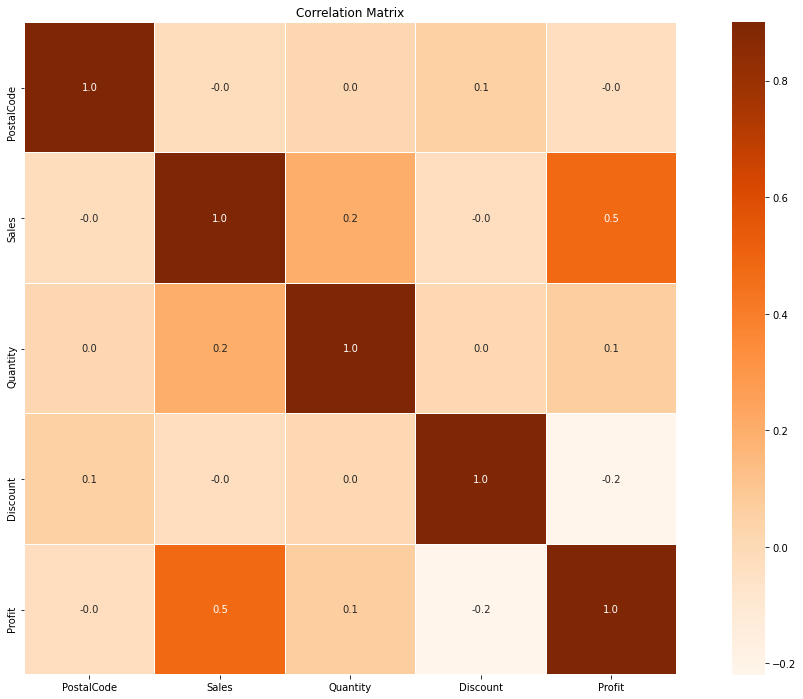

In [43]:
# Heat map_positive and negative correlation
plt.subplots(figsize=(20,12))
corrmat = df.corr()
plt.title("Correlation Matrix")
sns.heatmap(corrmat, vmax=0.9, square=True, cmap="Oranges", annot=True, fmt='.1f', linewidth='.1')


From the heatmap we can see the discount is effected a lot of profit, discount and profit is negative relative, and sales with profit are positive relative

**Data Nomolization**

---


In [44]:
# Normalization
def normalize(data,columns):
    for c in columns:
      data[c]=((data[c]-data[c].min())/(data[c].max()-data[c].min()))
    return data

columns = ['Profit','Sales','Discount']
data= normalize(data,columns)

data.head()

,OrderID,OrderDate,ShipDate,Segment,PostalCode,Region,ProductID,Sales,Quantity,Discount,Profit
0,CA-2017-152156,11/8/17,11/11/17,Consumer,42420.0,South,FUR-BO-10001798,0.011552,2.0,0.0000,0.442794
1,CA-2017-152156,11/8/17,11/11/17,Consumer,42420.0,South,FUR-CH-10000454,0.032313,3.0,0.0000,0.454639
2,CA-2017-138688,6/12/17,6/16/17,Corporate,90036.0,West,OFF-LA-10000240,0.000626,2.0,0.0000,0.440458
3,US-2016-108966,10/11/16,10/18/16,Consumer,33311.0,South,FUR-TA-10000577,0.042280,5.0,0.5625,0.414464
4,US-2016-108966,10/11/16,10/18/16,Consumer,33311.0,South,OFF-ST-10000760,0.000968,2.0,0.2500,0.440168


In [45]:
# Data Type Converting for One Hot Encoding
def typeconverter(data,columns,type='str'):
    for c in columns:
      data[c]=data[c].astype(type)
    return data

In [46]:
data.head()

,OrderID,OrderDate,ShipDate,Segment,PostalCode,Region,ProductID,Sales,Quantity,Discount,Profit
0,CA-2017-152156,11/8/17,11/11/17,Consumer,42420.0,South,FUR-BO-10001798,0.011552,2.0,0.0000,0.442794
1,CA-2017-152156,11/8/17,11/11/17,Consumer,42420.0,South,FUR-CH-10000454,0.032313,3.0,0.0000,0.454639
2,CA-2017-138688,6/12/17,6/16/17,Corporate,90036.0,West,OFF-LA-10000240,0.000626,2.0,0.0000,0.440458
3,US-2016-108966,10/11/16,10/18/16,Consumer,33311.0,South,FUR-TA-10000577,0.042280,5.0,0.5625,0.414464
4,US-2016-108966,10/11/16,10/18/16,Consumer,33311.0,South,OFF-ST-10000760,0.000968,2.0,0.2500,0.440168


#**Split Dataset**

**Modeling portion**


---

In [47]:
from sklearn.model_selection import train_test_split
data = pd.get_dummies(df)
X= data.drop(['Sales','Profit'], axis=1)
y =data ['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

**Linear Regression**


---

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from math import sqrt

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

#mean_squared_error: more small more better 
error = sqrt(mean_squared_error(y_test,y_pred))
print('RMSE:',error)

#R^2 ～= 1 is bitter
# R^2 = 1- ((y_true - y_pred) ** 2).sum() / (y_true - y_true.mean()) ** 2).sum()
print('R^2:', model.score(X_test, y_test))

# y = ax+b where a is coefficient and b is intercept
print('Intercept:', model.intercept_)
print('Coefficient:',model.coef_)

RMSE: 392.43204109498004
R^2: 0.5644260713359137
Intercept: 143.849515627895
Coefficient: [-9.82785029e-04  5.63916434e+01 -2.77438529e+02 ... -1.92993927e+02
 -9.92719958e+01 -8.75479751e+01]


Linear Regression 1.0


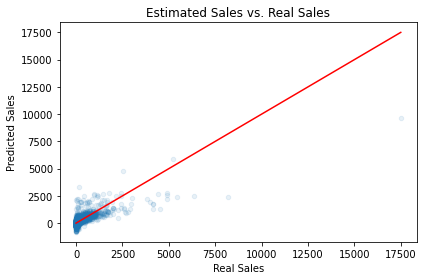

In [49]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, s=20,alpha=0.1)
plt.title('Estimated Sales vs. Real Sales')
plt.xlabel('Real Sales')
plt.ylabel('Predicted Sales')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.tight_layout()
print("Linear Regression",model.score(X_train, y_train))

**Random Forest Regression**


---

In [50]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.5872892035509085

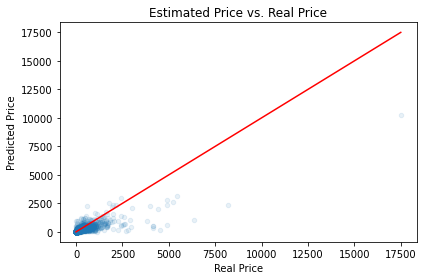

In [51]:
y_pred= rfr.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, s=20,alpha=0.1)
plt.title('Estimated Price vs. Real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.tight_layout()

**Decision Tree Regressor**

---

In [52]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Decision Tree Score",regressor.score(X_test, y_test))
print("Predicted sales: % d\n",y_pred)

Decision Tree Score 0.6039273196386764
Predicted sales: % d
 [479.04   65.12   41.95  ...  27.24  106.32   72.744]


**KNN Perdiction**

---

In [57]:
from sklearn import neighbors

# Checnk K from 1 to 20
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

print('\nWhen k is',rmse_val.index(min(rmse_val))+1, 'we can get minimum RMSE:', min(rmse_val))    

RMSE value for k=  1 is: 798.582016805753
RMSE value for k=  2 is: 677.1522650985029
RMSE value for k=  3 is: 643.6273959556003
RMSE value for k=  4 is: 626.9269644600295
RMSE value for k=  5 is: 616.5103358377371
RMSE value for k=  6 is: 620.1025122104045
RMSE value for k=  7 is: 614.0327217929814
RMSE value for k=  8 is: 611.0659190881249
RMSE value for k=  9 is: 604.489666075992
RMSE value for k=  10 is: 601.0264336557804
RMSE value for k=  11 is: 600.1195595843761
RMSE value for k=  12 is: 598.7825600387607
RMSE value for k=  13 is: 599.03400667738
RMSE value for k=  14 is: 598.6091942679283
RMSE value for k=  15 is: 598.2207884276659
RMSE value for k=  16 is: 596.6739323515635
RMSE value for k=  17 is: 596.4856978871213
RMSE value for k=  18 is: 596.077441602602
RMSE value for k=  19 is: 596.6241248316057
RMSE value for k=  20 is: 595.7773160663415

When k is 20 we can get minimum RMSE: 595.7773160663415


**XGBoost**
---

In [53]:
from xgboost import XGBRegressor

In [54]:
XGB = XGBRegressor(learning_rate =0.01, n_estimators=3460, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,nthread=4,
                                     scale_pos_weight=1,seed=7, 
                                     reg_alpha=0.00006).fit(X_train, y_train)

[21:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [55]:
y_pred = XGB.predict(X_test)
print("XGBoost Score", XGB.score(X_test, y_test))
print("Predicted sales:",y_pred)

XGBoost Score 0.6170638738774548
Predicted sales: [498.10504 258.5789  295.34003 ... 156.30122  63.37609 389.52805]
